### Loan Eligibility Prediction Using Machine
Learing Algorithms Loan Eligibility in broad terms means your ability / capacity to avail the loan from lender banks/NBFCs. It's the measurement tool of the banks to decide to lend what quantum of funds on the basis of your financial credentials  (Financialcredentials means your income), other obligations,additional source of income, etc.
### Problem / Objective Statement.
1. The informations / critera needed to get an approval for loan takes alot of time for verification. The reason was because people had to verify the documents provided by customers one after the order. So building a machine learning model was the perfect
## solution to the problem.
2. Banks also needed a model that would give a very good accuracy score to avoid running after their customers due to refusal to pay their loans on time.

3. Customers also needed fast and urgent replies on there loan approval.

## Solution to the Above Statement.

The best option was to build a machine learning model with a high performane to help both the
banks and customers for a greater satisfaction.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv("loan_data_set.csv")

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

<Axes: >

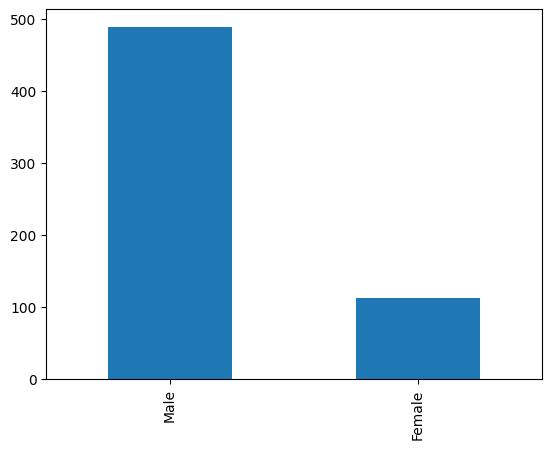

In [14]:
data['Gender'].value_counts().plot.bar()

<Axes: >

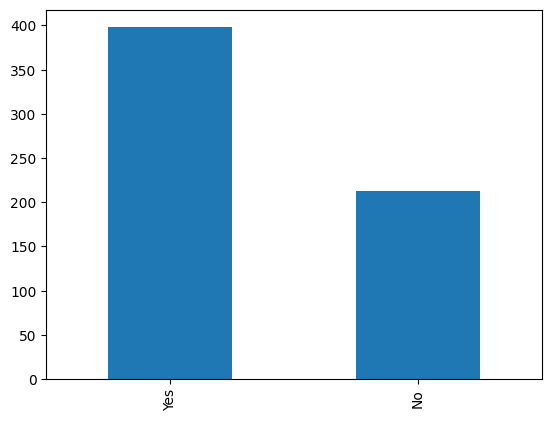

In [15]:
data['Married'].value_counts().plot.bar()

<Axes: >

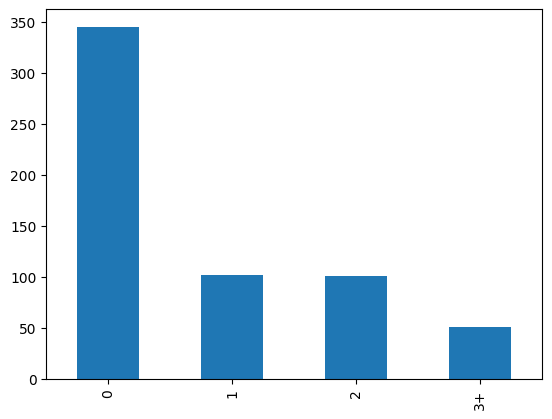

In [16]:
data['Dependents'].value_counts().plot.bar()

In [17]:
pd.crosstab(data['Credit_History'], data['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

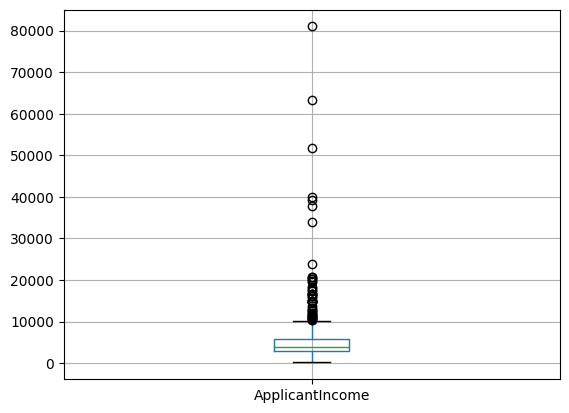

In [18]:
data.boxplot('ApplicantIncome')

<Axes: >

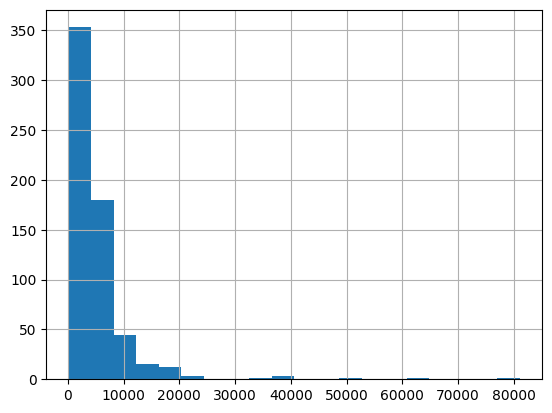

In [21]:
data['ApplicantIncome'].hist(bins=20)

<Axes: >

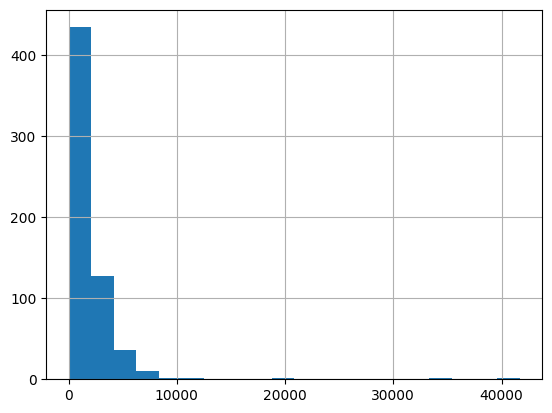

In [22]:
data['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

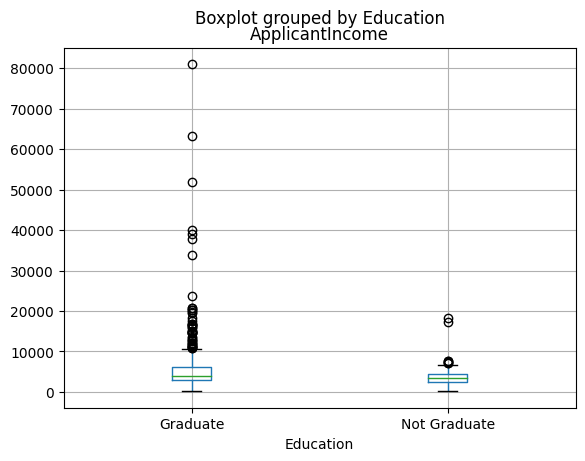

In [23]:
data.boxplot('ApplicantIncome', 'Education')

<Axes: >

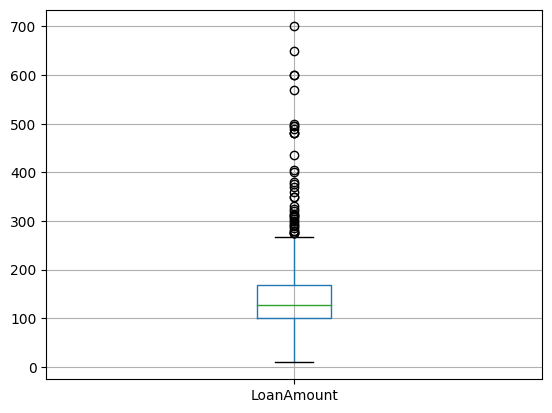

In [24]:
data.boxplot('LoanAmount')

<Axes: >

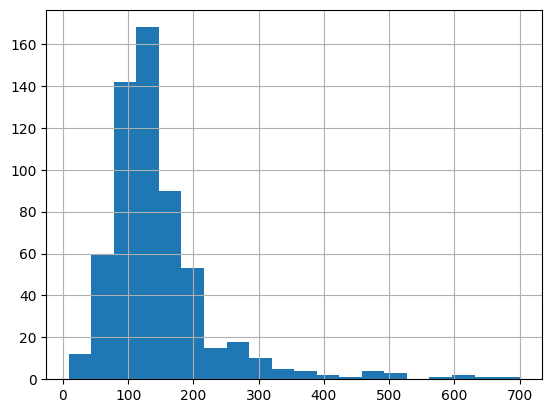

In [25]:
data['LoanAmount'].hist(bins=20)

<Axes: >

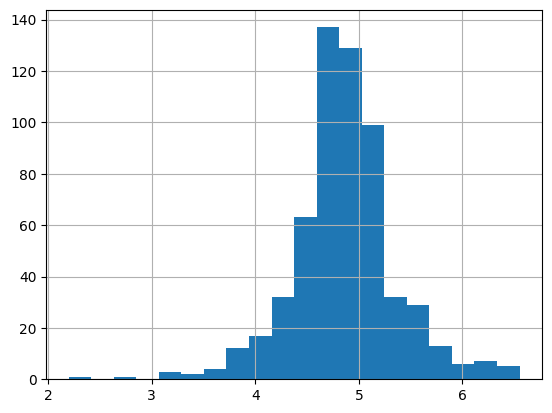

In [26]:
data['LoanAmount_log'] = np.log(data['LoanAmount'])
data['LoanAmount_log'].hist(bins=20)

In [27]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['LoanAmount_log'] = data['LoanAmount_log'].fillna(data['LoanAmount_log'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())


In [28]:
# fill the missing values for categorical terms - mode
data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])


In [29]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [30]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760


<Axes: >

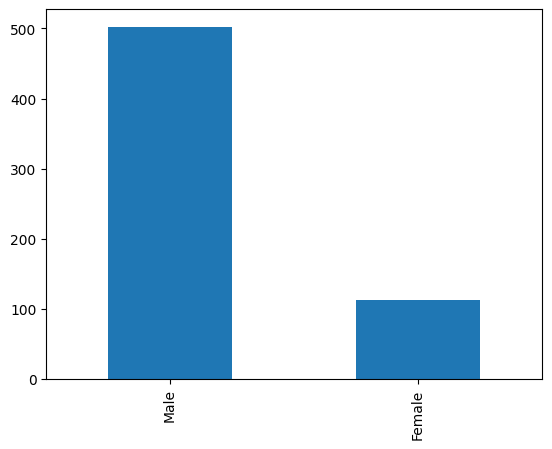

In [31]:
data['Gender'].value_counts().plot.bar()


<Axes: >

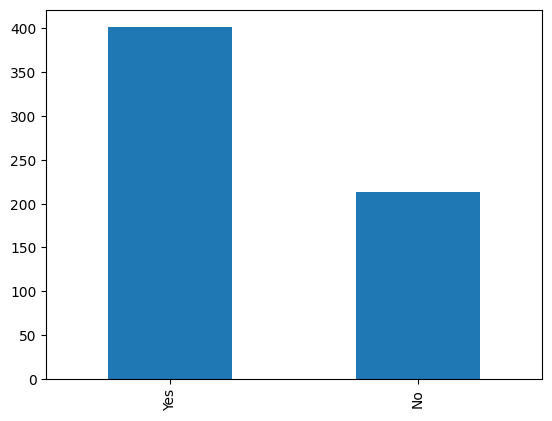

In [32]:
data['Married'].value_counts().plot.bar()


In [33]:
# total income
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data['TotalIncome_log'] = np.log(data['Total_Income'])

<Axes: >

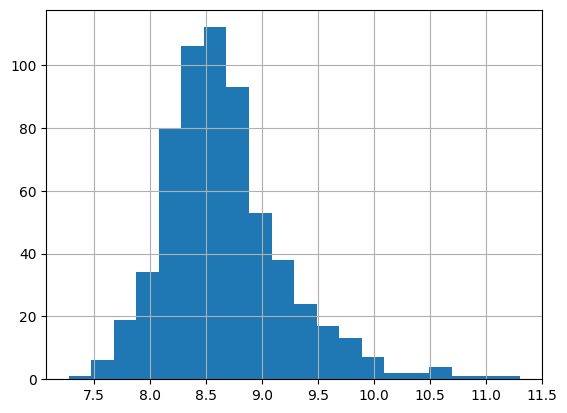

In [34]:
data['TotalIncome_log'].hist(bins=20)


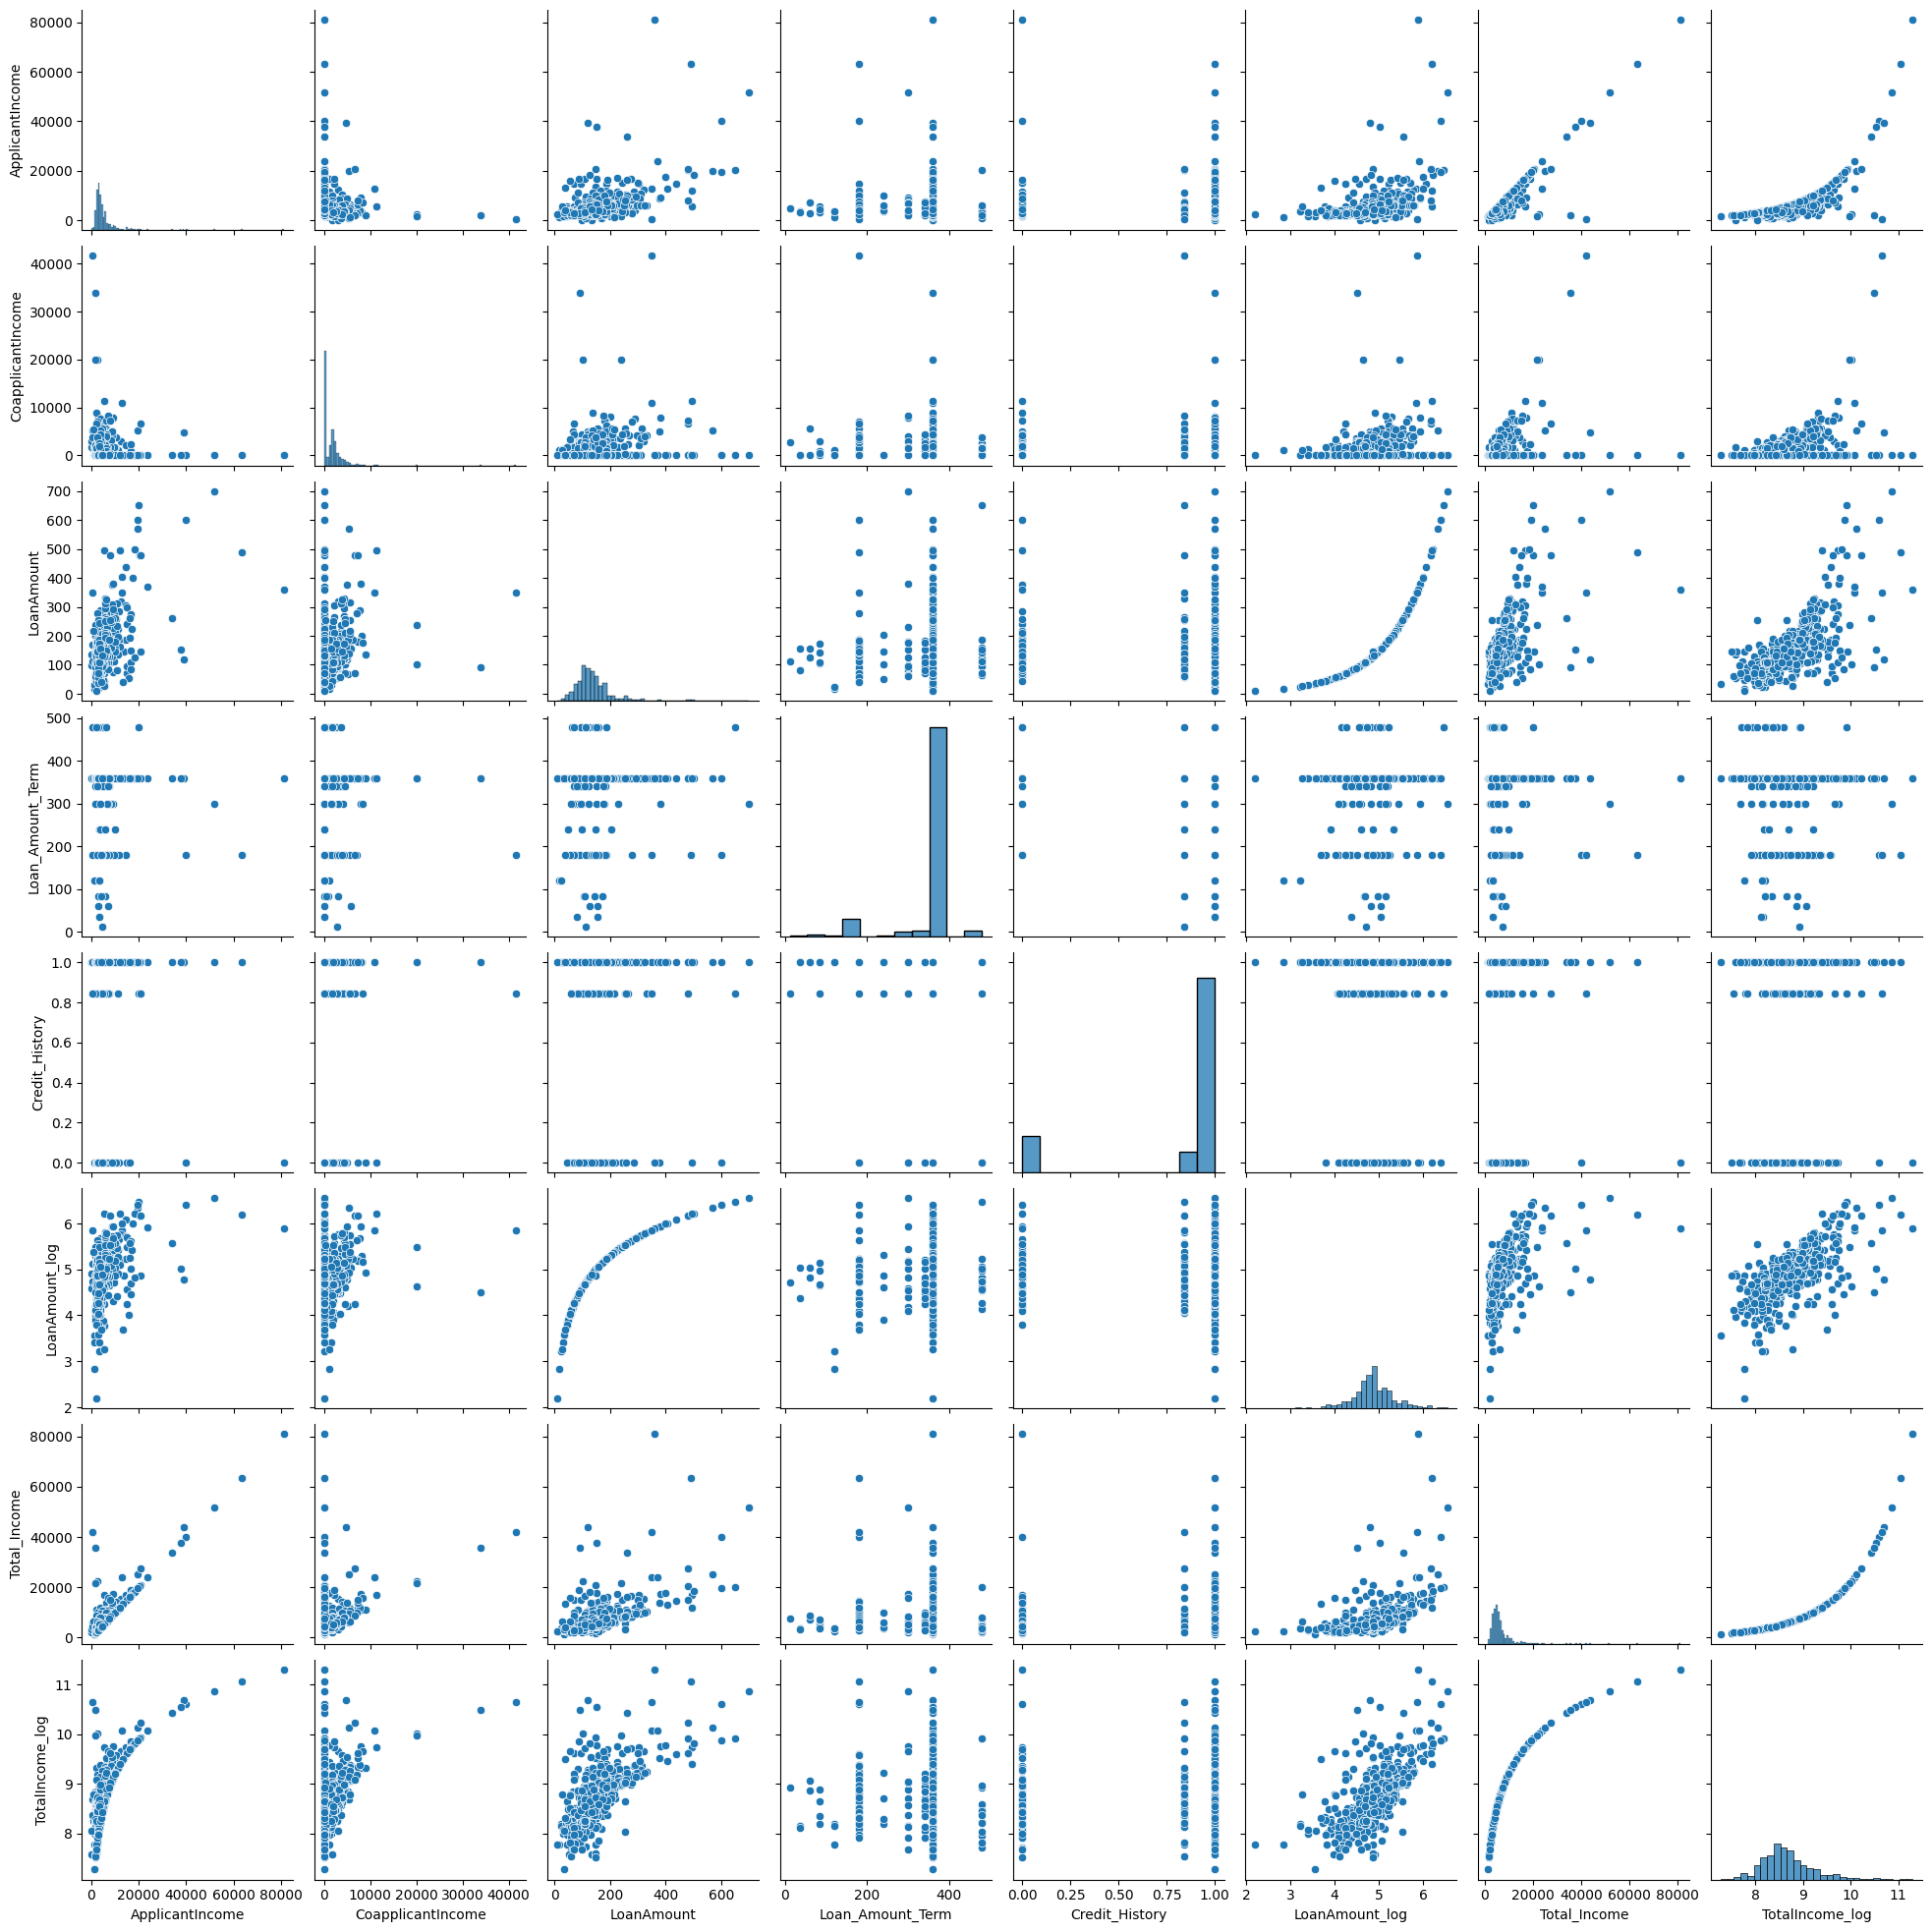

In [57]:
sns.pairplot(data)

In [72]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


C:\Users\User\AppData\Local\Temp\ipykernel_16724\2452760441.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data.corr(), annot = True)


<Axes: >

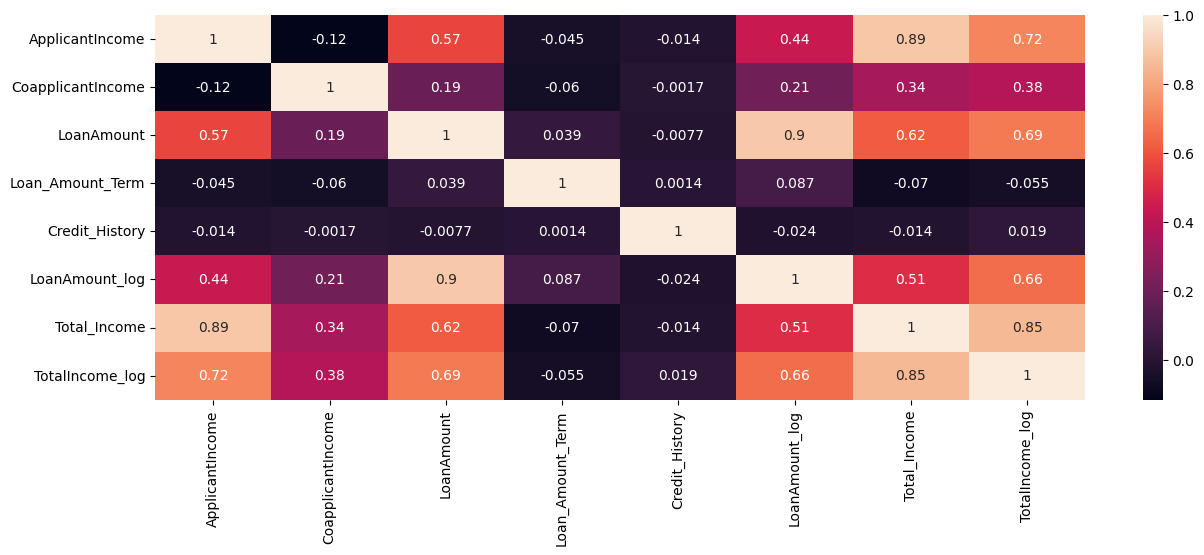

In [58]:
plt.figure(figsize =(15,5))
sns.heatmap(data=data.corr(), annot = True)

In [35]:
X = data.iloc[:,np.r_[1:5,9:11,13:15]].values
y = data.iloc[:,12].values

In [97]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income', 'TotalIncome_log'],
      dtype='object')

In [98]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [37]:
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [40]:

labelencoder_X = LabelEncoder()
for i in range(0, 5):
    X_train[:,i] = labelencoder_X.fit_transform(X_train[:,i])

In [41]:
X_train[:,7] = labelencoder_X.fit_transform(X_train[:,7])


In [42]:
X_train

array([[1, 1, 0, ..., 0.8421985815602837, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.857444178729352, 381],
       [1, 1, 0, ..., 1.0, 4.857444178729352, 414]], dtype=object)

In [43]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [44]:
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [45]:
for i in range(0, 5):
    X_test[:,i] = labelencoder_X.fit_transform(X_test[:,i])


In [46]:
X_test[:,7] = labelencoder_X.fit_transform(X_test[:,7])

In [47]:
labelencoder_y = LabelEncoder()
y_test = labelencoder_y.fit_transform(y_test)

In [109]:
X_test

array([[1, 1, 0, 0, 4, 1.0, 5.429345628954441, 109],
       [1, 1, 0, 0, 4, 0.8421985815602837, 4.867534450455582, 37],
       [1, 1, 2, 0, 4, 1.0, 5.062595033026967, 71],
       [0, 0, 0, 0, 4, 1.0, 4.2626798770413155, 11],
       [1, 0, 0, 0, 4, 1.0, 4.248495242049359, 7],
       [1, 1, 1, 0, 4, 1.0, 4.672828834461906, 33],
       [1, 1, 2, 0, 4, 1.0, 4.787491742782046, 24],
       [1, 1, 0, 0, 4, 1.0, 4.189654742026425, 13],
       [1, 1, 3, 1, 4, 1.0, 5.153291594497779, 36],
       [1, 1, 1, 0, 4, 1.0, 4.700480365792417, 34],
       [1, 1, 2, 0, 4, 0.0, 4.276666119016055, 57],
       [1, 1, 0, 0, 4, 1.0, 5.030437921392435, 62],
       [1, 1, 3, 1, 5, 1.0, 4.543294782270004, 10],
       [1, 1, 2, 1, 4, 1.0, 4.857444178729352, 61],
       [1, 1, 2, 0, 4, 1.0, 4.477336814478207, 94],
       [1, 1, 0, 0, 2, 0.8421985815602837, 4.553876891600541, 80],
       [1, 0, 0, 0, 4, 1.0, 4.07753744390572, 4],
       [1, 0, 0, 0, 4, 1.0, 5.017279836814924, 107],
       [1, 1, 1, 0, 4, 1.0, 4.9416

In [49]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [50]:
from sklearn.preprocessing import StandardScaler
stand = StandardScaler()
X_Train_stand = stand.fit_transform(X_train)
X_test_stand = stand.fit_transform(X_test)


In [107]:
X_test_stand

array([[ 4.27425207e-01,  6.18079665e-01, -7.97402361e-01,
        -5.05076272e-01,  2.87242495e-01,  4.66697964e-01,
         1.27227341e+00,  1.40919097e+00],
       [ 4.27425207e-01,  6.18079665e-01, -7.97402361e-01,
        -5.05076272e-01,  2.87242495e-01,  2.64995656e-02,
         1.31176735e-01, -6.68697012e-01],
       [ 4.27425207e-01,  6.18079665e-01,  1.18402169e+00,
        -5.05076272e-01,  2.87242495e-01,  4.66697964e-01,
         5.27364975e-01,  3.12527867e-01],
       [-2.33959061e+00, -1.61791442e+00, -7.97402361e-01,
        -5.05076272e-01,  2.87242495e-01,  4.66697964e-01,
        -1.09734553e+00, -1.41904545e+00],
       [ 4.27425207e-01, -1.61791442e+00, -7.97402361e-01,
        -5.05076272e-01,  2.87242495e-01,  4.66697964e-01,
        -1.12615599e+00, -1.53448367e+00],
       [ 4.27425207e-01,  6.18079665e-01,  1.93309663e-01,
        -5.05076272e-01,  2.87242495e-01,  4.66697964e-01,
        -2.64290531e-01, -7.84135233e-01],
       [ 4.27425207e-01,  6.180796

In [51]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
DTClassifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTClassifier.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [59]:
y_pred_DT = DTClassifier.predict(X_test)
y_pred_DT


array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [61]:
metrics.accuracy_score(y_pred_DT, y_test)*100


71.54471544715447

In [80]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
NBClassifier.fit(X_train, y_train)

GaussianNB()

In [102]:
y_pred_NB = NBClassifier.predict(X_test)
y_pred_NB

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0])

In [82]:
metrics.accuracy_score(y_pred_NB, y_test)*100


73.17073170731707

In [83]:
df1 = pd.DataFrame({'Actual':y_test,'DTClassifier':y_pred_DT,
                    'NBClassifier':y_pred_NB})
df1

,Actual,DTClassifier,NBClassifier
0,1,1,1
1,1,1,1
2,1,0,1
3,1,1,1
4,1,1,1
...,...,...,...
118,1,1,0
119,1,1,1
120,1,1,1
121,1,1,1


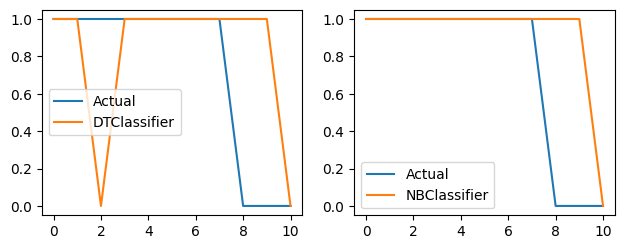

In [84]:
plt.subplot(221)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['DTClassifier'].iloc[0:11],label='DTClassifier')
plt.legend()

plt.subplot(222)
plt.plot(df1['Actual'].iloc[0:11],label='Actual')
plt.plot(df1['NBClassifier'].iloc[0:11],label='NBClassifier')
plt.legend()

plt.tight_layout()

In [85]:
r2_score_DT = metrics.r2_score(y_test,y_pred_DT)
r2_score_NB = metrics.r2_score(y_test,y_pred_NB)
print(r2_score_DT,r2_score_NB)

-0.25145348837209314 -0.1799418604651164


In [86]:
mae_DT = metrics.mean_absolute_error(y_test,y_pred_DT)
mae_NB = metrics.mean_absolute_error(y_test,y_pred_NB)
print(mae_DT,mae_NB)

0.2845528455284553 0.2682926829268293


In [87]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'LoanAmount_log', 'Total_Income', 'TotalIncome_log'],
      dtype='object')

In [117]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_Income,TotalIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,4.262680,2900.0,7.972466
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,3.688879,4106.0,8.320205
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,5.533389,8312.0,9.025456
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,5.231109,7583.0,8.933664


In [105]:
newdata = { 'Gender':1, 'Married':1, 'Dependents':0, 'Education':0,
           'Loan_Amount_Term':4, 'Credit_History':0, 
           'LoanAmount_log':4.867534450455582, 'Total_Income':37}

df = pd.DataFrame(newdata,index=[0])
df
#'Gender', 'Married', 'Dependents', 'Education','Loan_Amount_Term','Credit_History','LoanAmount_log', 'Total_Income'
#1, 1, 0, 0, 4, 0.8421985815602837, 4.867534450455582, 37

,Gender,Married,Dependents,Education,Loan_Amount_Term,Credit_History,LoanAmount_log,Total_Income
0,1,1,1,1,128,1,4.857444,6000.0


In [106]:
newdata_predict = NBClassifier.predict(df)
print(newdata_predict)

[0]


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(
